# Introduction to Scikit-Learn (sklearn)

This notebook demonstrated some of the most useful functions of the beautiful Scikit-learn library.

What we're going to cover:

0. An end-to-end Scikit Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improving a model
6. Save and load a trained model
7. Putting it all together

In [1]:
# let's listify the flow
what_were_covering= [
"0. An end-to-end Scikit Learn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improving a model",
"6. Save and load a trained model",
"7. Putting it all together"
]

In [2]:
what_were_covering


['0. An end-to-end Scikit Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improving a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

In [3]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [4]:
import numpy as np

In [3]:
# Getting the data ready.
import pandas as pd

heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
# Create X (feature matrix)
X = heart_disease.drop("target", axis=1)

# Create Y (labels)
Y = heart_disease["target"]


In [16]:
# Choose the right model and hyperparameters
# (Hyperparameters are like dials on the model that you can tune(change) to make the model better or worse)

from sklearn.ensemble import RandomForestClassifier

# We'll instantiate the above class using 'clf'..a short-hand for classifier in scikit-learn..at many places we can see the word 'model'

clf = RandomForestClassifier()

# We'll keep the default hyperparameters, to see what parameters what your model is using, 
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [17]:
# 3. Fit the model to training data 
# We need to train our model on a training set and then test it on a test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [18]:
# Below line will ask the RandomForest Classifying model to find the patterns in the training data
clf.fit(X_train, Y_train);

In [19]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2


In [20]:
# Make a prediction
Y_label = clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [21]:
# variable_preds is conventional name for making predictions on test data
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [22]:
Y_test

280    0
217    0
171    0
13     1
231    0
      ..
239    0
149    1
259    0
82     1
272    0
Name: target, Length: 61, dtype: int64

In [23]:
# 4. Evaluate the model on training data and test data
# --> to see how good the predictions or how well the ML model we've just trained our RandomForestClassifier has done learning on the trained data

clf.score(X_train, Y_train)

1.0

In [24]:
clf.score(X_test, Y_test)

0.8360655737704918

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [26]:
confusion_matrix(Y_test, y_preds)

array([[21,  6],
       [ 4, 30]], dtype=int64)

In [27]:
accuracy_score(Y_test, y_preds)

0.8360655737704918

In [28]:
#5. Improving a model
# Try different number of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,Y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set: 81.97%

Trying model with 20 estimators..
Model accuracy on test set: 83.61%

Trying model with 30 estimators..
Model accuracy on test set: 80.33%

Trying model with 40 estimators..
Model accuracy on test set: 81.97%

Trying model with 50 estimators..
Model accuracy on test set: 81.97%

Trying model with 60 estimators..
Model accuracy on test set: 81.97%

Trying model with 70 estimators..
Model accuracy on test set: 80.33%

Trying model with 80 estimators..
Model accuracy on test set: 81.97%

Trying model with 90 estimators..
Model accuracy on test set: 81.97%



In [29]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [30]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test,Y_test)

0.819672131147541

## 1. Getting our data ready to be used with Machine Learning

 Three main things we have to do:
        
        1. Split the data into features and labels (usually `X` and `y`)
        2. Filling(also called imputing) or disregarding missing values
        3. Convert non-numerical values into numerical values(also called feature encoding)
        

In [31]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [33]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [34]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [36]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [37]:
len(car_sales)

1000

In [38]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [39]:
# Split into X/y

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [40]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# TRain the model on training data so that it learns patterns
model.fit(X_train, y_train)
# Evaluate the model score on test set
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

# Why "Doors" also need to be included in the categorical feature alongside "Make" and "Colour" ?

#Doors have values of 4,5&3 which is numerical. But it's also catagorical because we can see that cars with 4 doors fall into 
#some category(856), cars with 5 doors in other(79)

In [86]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [42]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
#Arguments order in ColumnTransformer:name, actual_transformer, features we'd like to transform
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder="passthrough") 


In [47]:
X.head(10)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
5,Honda,Red,42652,4
6,Toyota,Blue,163453,4
7,Honda,White,43120,4
8,Nissan,White,130538,4
9,Honda,Blue,51029,4


In [85]:
transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [48]:
pd.DataFrame(transformed_X).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42652.0
6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,163453.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,43120.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,130538.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,51029.0


In [50]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [49]:
# Another way to do this
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [52]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill with some value(also known as imputation)
2. Remove the samples with missing data altogether

In [61]:
# Import car sales missing data.
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [63]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [64]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [65]:
# Let's try and convert our data to numbers.
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
#Arguments order in ColumnTransformer:name, actual_transformer, features we'd like to transform
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

In [66]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Option 1: Fill missing data with pandas

In [67]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [68]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [70]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [71]:
# Remove rows with missing "Price" value.. as we can't predict something that doesn't have a label

car_sales_missing.dropna(inplace=True)

In [72]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [73]:
len(car_sales_missing)

950

In [44]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [82]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
#Arguments order in ColumnTransformer:name, actual_transformer, features we'd like to transform
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [84]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2: Fill missing values with Scikit-Learn

In [7]:
import pandas as pd
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [8]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [9]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [10]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [45]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")


# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]


# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_features", num_imputer, num_features)
])


# Transform the data
# Fill train and test values seperately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [46]:
# Get our transformed data arrays back into DataFrames
car_sales_filled_train = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])


car_sales_filled_test = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [50]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [51]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
#Arguments order in ColumnTransformer:name, actual_transformer, features we'd like to transform
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder="passthrough")

# Fill train and test values seperately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.fit_transform(car_sales_filled_test)

# Check transformed and filled_X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [14]:
y = car_sales_missing["Price"]
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [52]:
# Now we've transformed X, let's see if we can fit a model
# Let's fit a model

import numpy as np
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.25366332156443805

## 2. Choose the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm.

* Classification - predicting whether a sample is one thing or another.
* Regression - predicting a number

### 2.1 Picking a machine learning model for a regression problem

In [4]:
# Import boston housing data set
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [5]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["Target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# How many samples ? 
len(boston_df)

506

In [13]:
# Let's try the Ridge Regressional model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Setup a random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("Target", axis=1)
y = boston_df["Target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6662221670168522

How do we improve this score ? 

What if Ridge wasn't working ?
Refer map.. i.e. Scikit Learning ML map

In [14]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("Target", axis=1)
y = boston_df["Target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8654448653350507

### 2.2 Choosing estimator for a Classification problem.

In [16]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`.

In [23]:
# Import the linearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC model
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC 
clf.score(X_test, y_test)

C:\Users\Acer\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [20]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [21]:
# Import the Random forest classifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the random forest classifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit
 1. If you have structured data, use ensemble methods
 2. If you have unstructured data, use Deep Learning or Transfer learning.

## 3. Fit the model/algorithm on our data and use it to make predictions.

### 3.1 Fitting the model to data

Different names for:
* `X` = features, feature variables, data
* `Y` = labels, targets, target variables

In [26]:
"""EXPLANATION OF THE FIT() METHOD"""

# Import the Random forest classifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier model
clf = RandomForestClassifier()

# Fit the model to the data(training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the random forest classifier (use the patterns the model has learned) 
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:

1. predict()
2. predict_proba()

In [27]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [28]:
# Use a trained model to make predictions

clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [30]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [32]:
# Compare predictions to truth labels to evaluate the model. THIS IS WHAT clf.score() DOES BEHIND THE SCENES
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [33]:
clf.score(X_test, y_test)

0.8524590163934426

In [35]:
# Another way of doing this
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

### Make predictions with `predict_proba()`

In [37]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [38]:
# Let's predict on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for Regression models

In [39]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("Target", axis=1)
y = boston_df["Target"]

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [45]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [47]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [49]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

In [50]:
what_were_covering

['0. An end-to-end Scikit Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improving a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

## 4. Evaluating a machine learning model

3 ways to evaluate Scikit-Learn model/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem specific metric functions.


### 4.1 Evaluating a model with the `score` method

In [4]:
heart_disease = pd.read_csv("data/heart-disease.csv")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier model
clf = RandomForestClassifier()

# Fit the model to the data(training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the random forest classifier (use the patterns the model has learned) 
clf.score(X_test, y_test)

0.8524590163934426

In [8]:
clf.score(X_train, y_train)

1.0

In [12]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("Target", axis=1)
y = boston_df["Target"]

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

In [13]:
model.score(X_test, y_test)

0.8654448653350507

4.2 Evaluating a model using the `scoring` parameter

In [16]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier model
clf = RandomForestClassifier()

# Fit the model to the data(training the machine learning model)
clf.fit(X_train, y_train);


In [17]:
clf.score(X_test, y_test)

0.8524590163934426

In [18]:
cross_val_score(clf, X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [19]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Default scoring parameter of classifier = mean accuracy

In [20]:
# Scoring paramteter set to None by default
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2 1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

Accuracy

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestRegressor()
cross_val_score= cross_val_score(clf,X,y,cv=25)

In [42]:
np.mean(cross_val_score)

0.03394933333333333

In [44]:
print(f"Heart disease classifier cross-validator accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart disease classifier cross-validator accuracy: 3.39%


**Area under the receiver operating characteristic curve(AUC/ROC)

* Area under curve(AUC)
* ROC curve

ROC curves are a comparision of a model's true positive rate a.k.a. TPR versus a model's false 
positive rate(FPR)

* True positive = model predicts 1 when the truth is 1
* False positive = model predicts 1 when the truth is 0

* True negative = model predicts 0 when the truth is 0
* False negative = model predicts 0 when the truth is 1


In [47]:
# Create X_test...etc
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf =  RandomForestClassifier()

In [62]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.56, 0.44],
       [0.42, 0.58],
       [0.48, 0.52],
       [0.96, 0.04],
       [0.22, 0.78],
       [0.65, 0.35],
       [0.59, 0.41],
       [0.25, 0.75],
       [0.68, 0.32],
       [0.99, 0.01]])

In [63]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.44, 0.58, 0.52, 0.04, 0.78, 0.35, 0.41, 0.75, 0.32, 0.01])

In [59]:
# Calculate the fpr, tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

In [64]:
fpr

array([0.     , 0.     , 0.     , 0.     , 0.03125, 0.0625 , 0.0625 ,
       0.0625 , 0.09375, 0.125  , 0.125  , 0.15625, 0.1875 , 0.1875 ,
       0.1875 , 0.1875 , 0.25   , 0.25   , 0.28125, 0.28125, 0.34375,
       0.34375, 0.40625, 0.40625, 0.59375, 0.59375, 0.625  , 0.78125,
       0.84375, 0.875  , 0.96875, 1.     ])

In [65]:
tpr

array([0.        , 0.06896552, 0.13793103, 0.20689655, 0.20689655,
       0.24137931, 0.31034483, 0.44827586, 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.55172414, 0.5862069 , 0.68965517,
       0.72413793, 0.72413793, 0.75862069, 0.75862069, 0.79310345,
       0.86206897, 0.89655172, 0.89655172, 0.93103448, 0.93103448,
       0.96551724, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

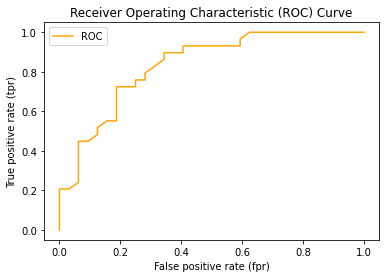

In [70]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr) of a model.
    """
    
    plt.plot(fpr,tpr,color="orange", label="ROC")
    
    # Plot line with no predictive power(baseline)
    
    #plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    

plot_roc_curve(fpr,tpr)

In [69]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8415948275862069

In [74]:
# Plot perfect ROC curve and AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
fpr

array([0., 0., 1.])

In [75]:
tpr

array([0., 1., 1.])

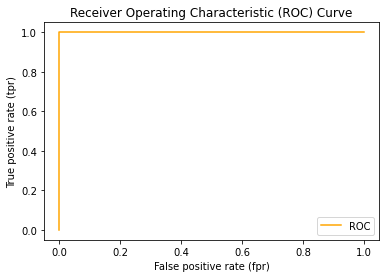

In [76]:
plot_roc_curve(fpr,tpr)

In [77]:
# Perfect AUC score

roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [23]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)


array([[24,  5],
       [ 4, 28]], dtype=int64)

In [8]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [9]:
24 + 5 + 4 + 28

61

In [10]:
len(y_preds)

61

* True positive = model predicts 1 when the truth is 1
* False positive = model predicts 1 when the truth is 0

* True negative = model predicts 0 when the truth is 0
* False negative = model predicts 0 when the truth is 1


In [14]:
# How to install a conda package into the current environment from a Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Acer\Desktop\sample_project_1\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.11.1             |     pyhd3eb1b0_0         212 KB
    ------------------------------------------------------------
                                           Total:         212 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.1-pyhd3eb1b0_0




seaborn-0.11.1       | 212 KB    |            |   0% 
seaborn-0.11.1       | 212 KB    | 7          |   8% 
seaborn-0.11.1       | 212 KB    | ##2        |  23% 
seaborn-0.11.1       | 212 KB    | ###7       |  38% 
seaborn-0.11.1       | 212 KB    | #####2     |  53% 
seaborn-0.11.1       | 212 KB    | ######7    |  68% 
seaborn-0.11.1       | 212 KB    | ########2  | 

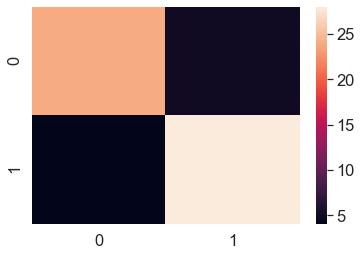

In [16]:
# Make our confusion matrix more visual than Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat);

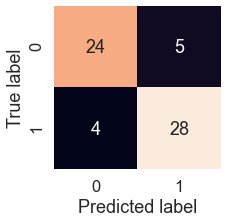

In [19]:
def plot_conf_mat(conf_mat):
    """
    Plot the confusion matrix using seaborn's heatmap
    """
    
    fig,ax  = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, 
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label");
    
    # Fix the broken annotations(this happens in matplotlib 3.1.1, NOT IN OUR CASE)
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top-0.5)
    
plot_conf_mat(conf_mat)

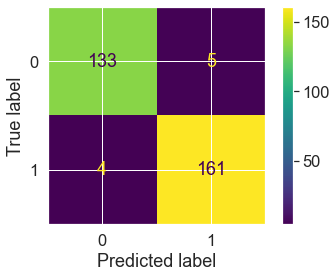

In [24]:
from sklearn.metrics import plot_confusion_matrix

#clf
plot_confusion_matrix(clf, X, y)

In [25]:
len(X), len(y)

(303, 303)

In [26]:
133 + 5 + 4 +161

303

**Classification Report**

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [30]:
# Where prediction and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only 1 positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
    
    * Accuracy is a good measure to start with if all classes are balanced(e.g. same amount of samples which are labelled 
                                                                           with 0 or 1)
    * Precision and recall became more important when classes were imbalanced
    * If false positive predictions are worse than false negatives, aim for higher precision
    * If false negative predictions are worse than false positives, aim for higher recall
    * F1-score is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or co-efficient of determination
2. Mean absolute error(MAE)
3. Mean Squared error(MSE)

**R^2**

What R-squared does ?
It compares your model's predictions to the mean of the targets. Values cam range from negative infinity(a very poor model)
to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model
perfectly predicts a range of numbers, it's R^2 value would be 1

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
boston

boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["Target"] = pd.Series(boston["target"])

np.random.seed(42)

# Create the data
X = boston_df.drop("Target", axis=1)
y = boston_df["Target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = RandomForestRegressor()
model.fit(X_train, y_train);


In [33]:
model.score(X_test, y_test)

0.8654448653350507

In [7]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [37]:
y_test.mean()

21.488235294117644

In [39]:
y_test_mean[:10]

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529])

In [40]:
r2_score(y_test, y_test_mean)

0.0

In [42]:
r2_score(y_test, y_test)

1.0

**Mean absolute error(MAE)**

It is formally defined as the average of absolute differences between predictions and actual values. It gives you an idea
of how wrong your model's predictions are..

In [11]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [13]:
df = pd.DataFrame(data = {"Actual values": y_test, "Predicted Values": y_preds})
df["Differences"] = df["Predicted Values"] - df["Actual values"]
df

,Actual values,Predicted Values,Differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**By absolute, it means that it will turn all values in pd["Differences"] column as positive first, add them all and then take 
#the mean**

above value for MAE is 2.12... which means that. On average, every prediction our model makes, it's going to be on average 
plus or minus 2.12 away from the actual value

**Mean Squared error(MSE)**

In [20]:
#Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [22]:
# Calculate MSE by hand
squared = np.square(df["Differences"])
squared.mean()

9.867437068627442

### 4.23 Finally using the `scoring` parameter

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

heart_disease = pd.read_csv("data/heart-disease.csv")

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [6]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [7]:
# Cross validated accuracy
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [10]:
# will be same as above,
# if scoring=None, it will use by default method of classifier which is .score (e.g clf.score)
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5, scoring="accuracy")
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [12]:
# Precision
cv_precision = cross_val_score(clf,X,y,cv=5, scoring="precision")
np.mean(cv_precision)

0.8209201193072161

In [13]:
# Recall
cv_recall = cross_val_score(clf,X,y,cv=5, scoring="recall")
np.mean(cv_precision)

0.8209201193072161

In [14]:
# F1
cv_f1 = cross_val_score(clf,X,y,cv=5, scoring="f1")
np.mean(cv_f1)

0.8455032904593217

How about our regression model ? 

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
boston = load_boston()

boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["Target"] = pd.Series(boston["target"])

np.random.seed(42)

# Create the data
X = boston_df.drop("Target", axis=1)
y = boston_df["Target"]

model = RandomForestRegressor()

In [18]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X,y,cv=5,scoring=None) # as scoring is none,cross_val_score will use default 
                                                       # evaluation metric in the score function which is r^2 
np.mean(cv_r2)

0.6243870737930857

In [17]:
#Will be same as above if we print cv_r2, instead of mean
np.random.seed(42)
cv_r2 = cross_val_score(model, X,y,cv=5,scoring='r2') 
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [ ]:
## All scorer objects follow the convention that higher return values are better then lower return values

In [20]:
# Mean absolute error
cv_mae = cross_val_score(model, X,y,cv=5,scoring='neg_mean_absolute_error') 
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [21]:
# Mean squared error
cv_mse = cross_val_score(model, X,y,cv=5,scoring='neg_mean_squared_error') 
cv_mse

array([ -7.8141513 , -12.94343325, -19.11614042, -46.28783248,
       -19.48161818])

In [22]:
np.mean(cv_mse)

-21.12863512415064

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

What essentially does an evaluation metric do ?

:: IT COMPARES OUR MODEL'S PREDICTIONS TO THE TRUTH LABELS OR THE ACTUAL LABELS

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)}") # TO GET AN IDEA OF HOW MANY FALSE POSITIVES THERE ARE 
print(f"Recall: {recall_score(y_test,y_preds)}")       # TO GET AN IDEA OF HOW MANY FALSE NEGATIVES THERE ARE
print(f"F1: {f1_score(y_test,y_preds)}")               # COMBINATION OF PRECISION AND RECALL

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("Target", axis=1)
y = boston_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}") 
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

Regression model metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


### 5. Improving a model

First predictions = baseline predictions
First model = baseline model

To improve model, 

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Parameters

* Parameters or Data Parameters = patterns in data that the machine learning finds
* HyperParameters = settings on a model you can adjust to `potentially` improve it's ability to find patterns

3 ways to adjust Hyper Parameters:
1. By hand (will tune them by hand)
2. Randomly with RandomSearchCV (a function in Scikit Learn)
3. Exhaustively with GridSearchCV

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
# TO get the hyperParameters on RandomFOrestClassifier
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters by hand

`TIDBIT`:
* Model gets trained on a Training set.
* HyperParameters are tuned on a validation set.
* Model is evaluated on test set.

### Let's make 3 sets: Training, validation and test


In [34]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

What we're going to try and adjust

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n-estimators`

In [16]:
# Since, we're going to be evaluating few models, we shall create an evaluation function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparision on y_true labels vs y_pred labels on a CLASSIFICATION model.
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                   "precision": round(precision,2),
                   "recall": round(recall,2),
                   "f1": round(f1,2)}
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [21]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffeled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffeled.drop("target", axis=1)
y = heart_disease_shuffeled["target"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffeled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffeled)) # 15% of data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

#len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

#train_split, valid_split --> (212,257)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


In [22]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 80.00%
Precision: 0.81
Recall: 0.84
F1 score: 0.82


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [18]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Create a dictionary of the hyperparameters we'd like to adjust as keys, and set values of the hyperparameters

grid = {"n_estimators": [10,100,200,500,1000,1200],
        "max_depth": [None,5,10,20,30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4] 
       }

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffeled.drop("target", axis=1)
y = heart_disease_shuffeled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_jobs=1)

# Setup randomized search CV
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)


# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.7s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   51.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [24]:
# Below thing will show us the combination of hyper parameters which got the best results.
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [24]:
# Make predictions with the best Hyper Parameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 95.65%
Precision: 1.00
Recall: 0.92
F1 score: 0.96


### 5.3 Hyperparameter tuning with GridSearchCV

**Difference between RandomizedSearchCV and GridSearchCV**
    * In RandomizedSearchCV, there is a parameter called n_iter which we can set to limit the number of models to try.
    
    * GridSearchCV is kind of like a brute force search..it means it will go through every single combination that is
      available in `grid` dictionary, so in total, it will try 2700(look grid below) different parameters it would
      try or say the combination of parameters.
      
      
      2700 models = (6*5*2*3*3) * 5, where first bracket is the multiplication of no. of values for each dict key and the 5 is                                      equal to the value of cv..which means cross validated value

In [5]:
grid = {"n_estimators": [10,100,200,500,1000,1200],
        "max_depth": [None,5,10,20,30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4] 
       }


In [10]:
# Reducing the grid space for GridSearchCV as it needs a lot of computation power
# We're updating grid_2 after looking at rs_clf.best_params_(ABOVE).. now we've reduced search space for HyperParameters.
grid_2 = {"n_estimators": [100,200,500],
          "max_depth": [None],
          "max_features": ["auto", "sqrt"],
          "min_samples_split": [6],
          "min_samples_leaf": [1,2] 
       }


In [9]:
# Now we've 60 parameters which is less than 2700 and is feasible
# (parameter_count) * (cv) = (3*1*2*1*2) * (5)
3*1*2*1*2*5

60

In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.random.seed(42)

# Shuffle the data
heart_disease_shuffeled = heart_disease.sample(frac=1)


# Split into X and y
X = heart_disease_shuffeled.drop("target", axis=1)
y = heart_disease_shuffeled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_jobs=1)

# Setup grid search CV
gs_clf = GridSearchCV(estimator=clf, 
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2)


# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   46.8s finished


In [14]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [31]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions 
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 89.13%
Precision: 0.95
Recall: 0.84
F1 score: 0.89


Let's compare our different model metrics. 

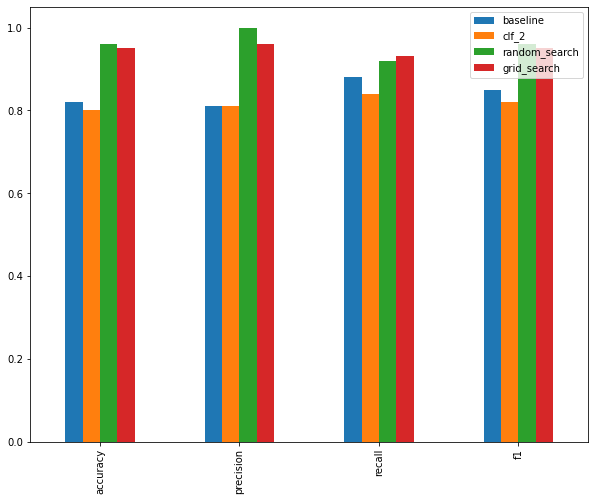

In [25]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random_search": rs_metrics,
                                "grid_search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

In [26]:
what_were_covering

['0. An end-to-end Scikit Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improving a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

**Forward/Backward Atttribute selection**

* Backward Attribute Selection:- It essentially says train the model on all attributes and then slowly start to start taking
                                 away attributes or columns to train your model. 
                                 
* Forward attribute Selection:- Start with just one column when you train the model and keep adding one attribute at a time
                                until you get the proper accuracy. 
                                
* E.g. Let's say you keep increasing columns and if after the fiftieth columns, all the other attributes that you added just
       don't improve the model, then maybe we might not need it.
       
       
* This forward/backword attribute selection are always for us to test our model, reduce our data if we want to 

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [26]:
# Pickle module implements binary protocols for serializing and de-serializing a Python object structure. In our case,
# the python object is our model. e.g. gs_clf, rs_slf as above
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [28]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [30]:
# Make some predictions
# As the pkl file is stored in the currnet directory, if someone want to make predictions, they don't need to go through and
# execute the training sets above... 
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 89.13%
Precision: 0.95
Recall: 0.84
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.95, 'recall': 0.84, 'f1': 0.89}

**Joblib**

In [32]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [33]:
# Import a saved joblib model
loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [34]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 89.13%
Precision: 0.95
Recall: 0.84
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.95, 'recall': 0.84, 'f1': 0.89}

In [35]:
what_were_covering

['0. An end-to-end Scikit Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improving a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

## 7. Putting it all together!

In [36]:
# Scikit-Learn Pipeline class --> It is a way to string together a number of different Scikit-Learn processes in one hit.. s
                                  #.similar to writing a function

In [37]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [38]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [39]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
    
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [50]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder # to convert data to numbers

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True ) # Dropeed the rows which contain missing price values a.k.a missing labels


# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))]) # ignore if an unknown categorical featureis present 


door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup the preprocessing steps (fill missing values, then convert to numbers)
preprocesser = ColumnTransformer(
transformers=[
   ("cat", categorical_transformer, categorical_features),
   ("door", door_transformer, door_feature),
   ("num", numeric_transformer, numeric_features)
])


# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocesser),
    ("model", RandomForestRegressor())])


# Split data

X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Fit and score the model
model.fit(X_train, y_train) # calls model = PipeLine defined above
model.score(X_test, y_test)


0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our Pipeline.

In [51]:
# Use GridSearchCV to find better hyperparameters on our random forest regressor and improve the score with our Regresson pipeline
# for key name in pipe_grid, look at name arguments(1st argument in model steps=,transformers= and numeric_transformer=) 
# in above cells to understand (This is ONLY FOR 1st key name)

from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], # Try out mean and median
    "model__n_estimators": [100,1000],
    "model__max_depth": [None,5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.5s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   2.4s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.4s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.4s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [52]:
gs_model.score(X_test, y_test)

0.3339554263158365

In [53]:
what_were_covering

['0. An end-to-end Scikit Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improving a model',
 '6. Save and load a trained model',
 '7. Putting it all together']